## INFO 6105 : Data Science Engineering Methods & Tools 


### Team 10
1. Aishwarya Lamture
2. Atharva Pande 
3. Sneha Methwani
4. Sai Vennela Nekkati


## Diabetes Prediction based on diagnostic measures

Dataset Link: 
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

### Problem Statement
This project's goal is to predict diabetes based on different diagnostic and medical parameters. 

### Background
The dataset is part of the large dataset held at the National Institutes of Diabetes-Digestive-Kidney Diseases in the USA. Data used for diabetes research on Pima Indian women aged 21 and over living in Phoenix, the 5th largest city of the State of Arizona in the USA. The target variable is specified as "outcome"; 1 indicates positive diabetes test result, 0 indicates negative.

Number of variables: 9, Number of observation : 768

### Metadata

1. Pregnancies: Number of pregnancies

2. Glucose : 2-hour plasma glucose concentration in the oral glucose tolerance test

3. Blood Pressure : Blood Pressure (minor blood pressure) (mm Hg)

4. SkinThickness : Skin Thickness

5. Insulin: 2-hour serum insulin (mu U/ml)

6. DiabetesPedigreeFunction : Function (2-hour plasma glucose concentration in oral glucose tolerance test)

7. BMI : Body mass index

8. Age : Age (years)

9. Outcome : Have the disease (1) or not (0)

### Approach
1. Import Data
2. EDA (Exploratory Data Analysis)
3. Data Cleansing
4. Data Scaling
5. Data Modeling
6. Hyperparameter Tuning
7. Performance Plots

#### Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.metrics import confusion_matrix,accuracy_score,matthews_corrcoef,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import missingno as msno
from sklearn.metrics import roc_auc_score


#### Load the dataset from csv file

In [2]:
pwd

'C:\\Users\\sneha\\Documents\\INFO_6105_DSEM\\ProjectDSem'

In [3]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Perform Exploratory Data Analysis


In [4]:
diabetes_data.shape

(768, 9)

In [5]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Get statistical details about data like mean, median, count etc

In [6]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### Columns: Glucose,BloodPressure,SkinThickness,Insulin,BMI contain 0 value which is unusual. 


Let us find the count of 0 values in the above mentioned columns by first creating a copy of original dataset and then replacing 0 with Nan 


In [7]:
diabetes_data_copy = diabetes_data.copy(deep = True)

diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [8]:
col_null = diabetes_data_copy.isnull().sum()
col_null

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

This gives us the count of 0's in each column. Now let's go ahead and create a bar graph to understand the magnitude of 0's

<AxesSubplot:xlabel='Features', ylabel='Count of 0 Values'>

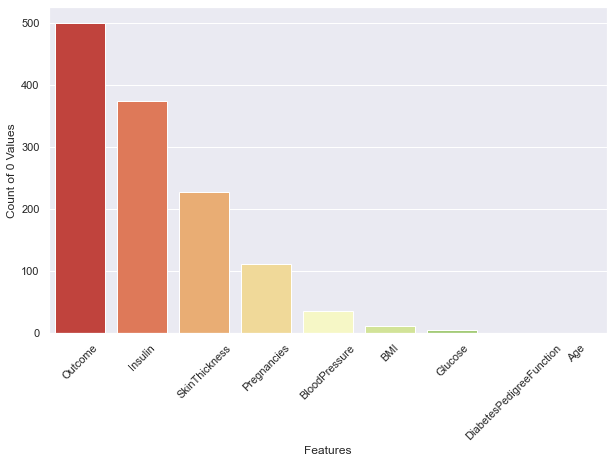

In [9]:
zero_count = diabetes_data.eq(0).sum()
zero_count_df = pd.DataFrame(zero_count)
zero_count_df.reset_index(inplace=True)

zero_count_df.columns = ['Features' , 'Count of 0 Values']
plt.figure(figsize = (10,6))
plt.xticks(rotation=45)
sns.barplot(x = 'Features', y = 'Count of 0 Values', data =  zero_count_df , 
             order = zero_count_df.sort_values('Count of 0 Values', ascending=False).Features,
           palette = ('RdYlGn'))

We now want to impute the 0's in the dataset. Let us first understand how the data is distributed in each of the columns.

#### Data Distribution - Histogram plot for all parameters

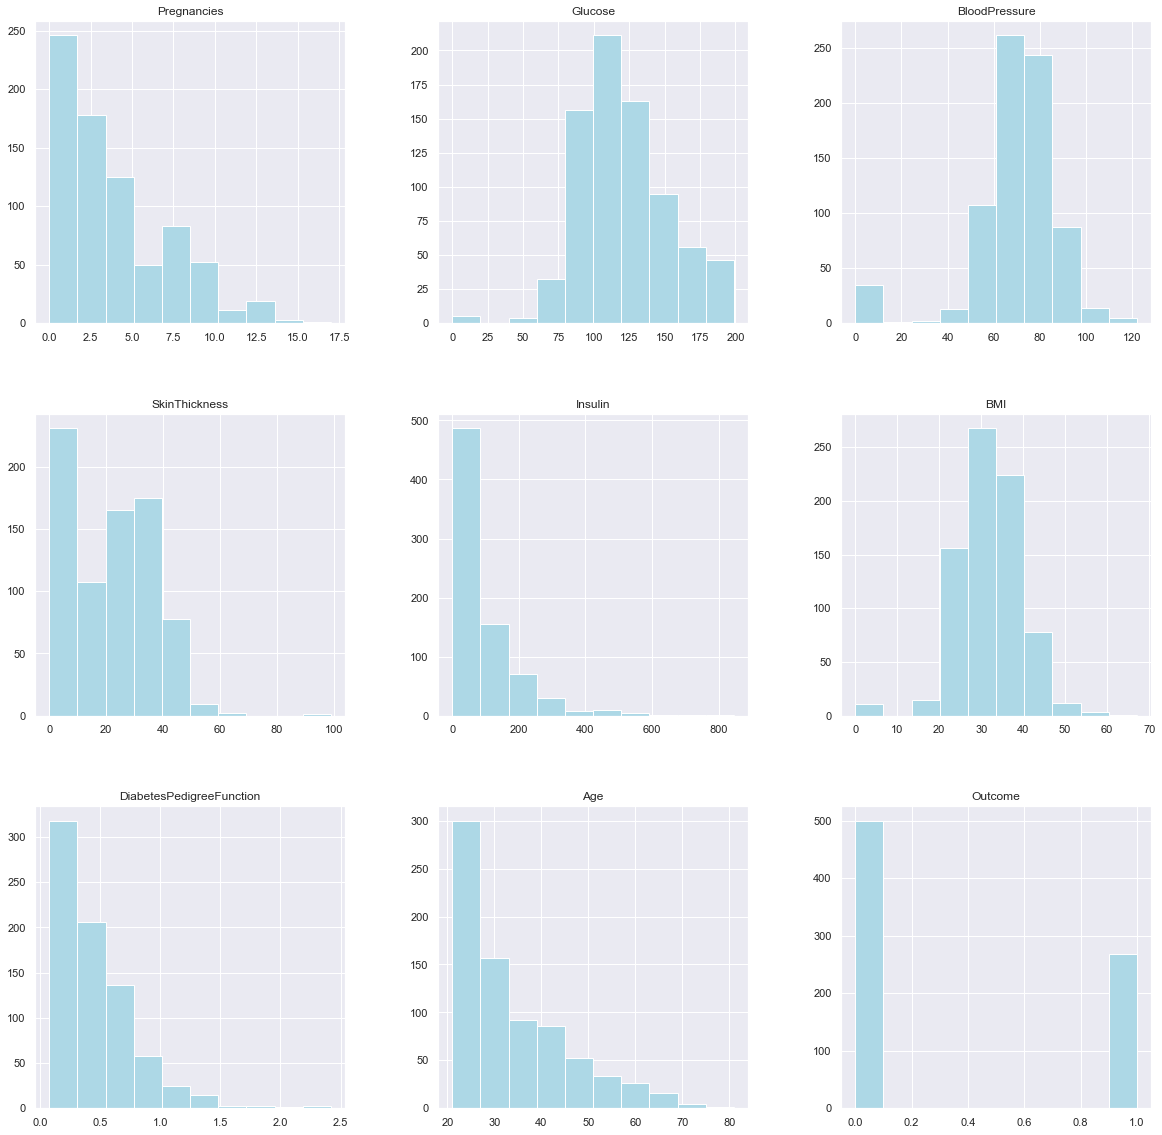

In [10]:
p = diabetes_data.hist(figsize = (20,20) , color = "lightblue")

#### Imputing Glucose, BloodPressure, SkinThickness, Insulin and BMI based on data distribution

In [11]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

In [12]:
diabetes_data_copy.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


#### Histogram plots after imputation

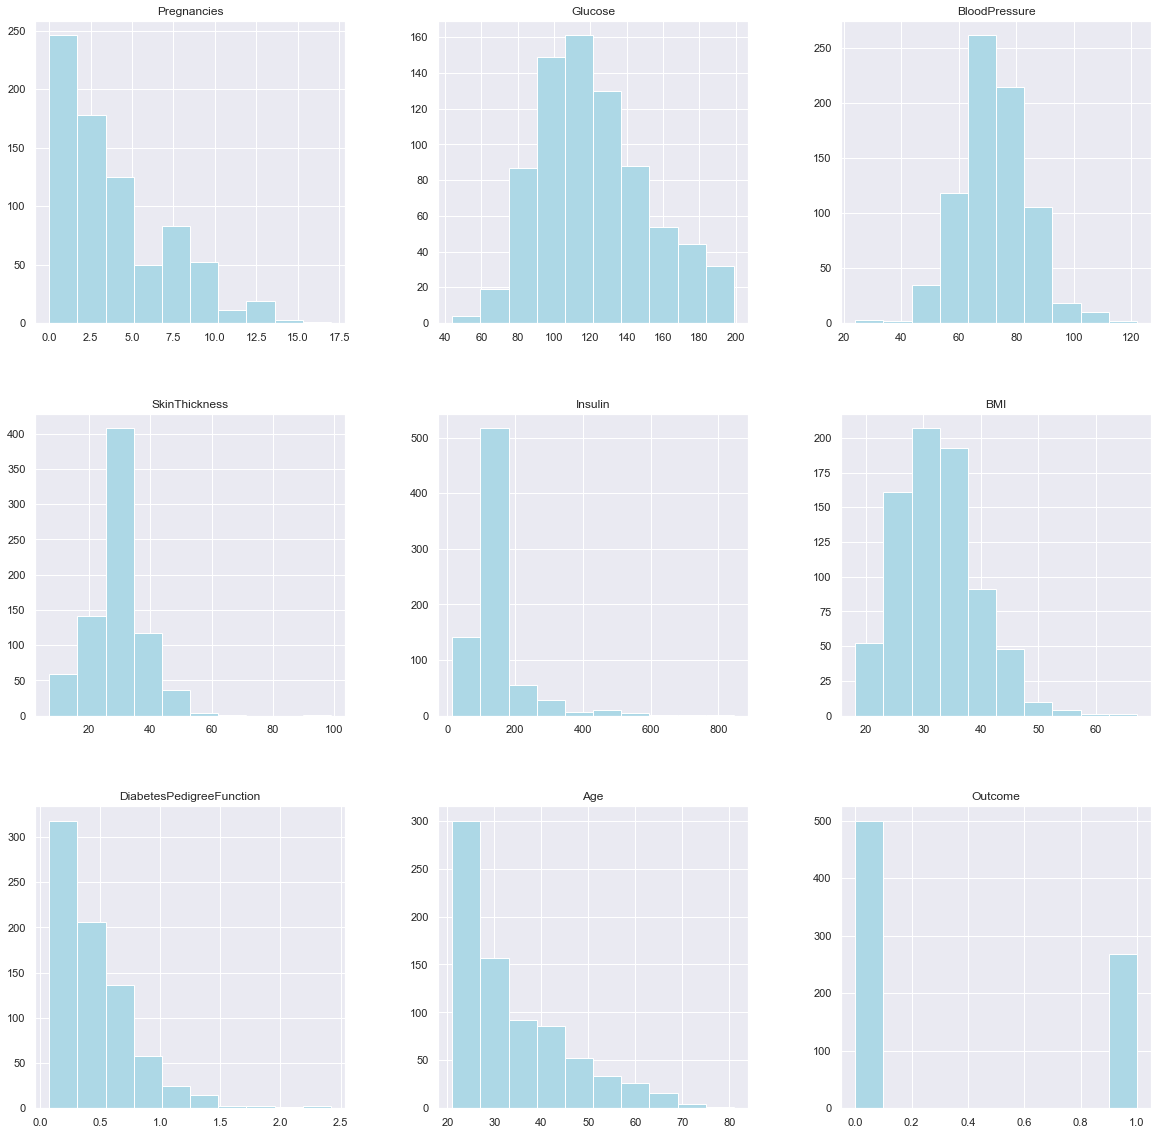

In [13]:
p = diabetes_data_copy.hist(figsize = (20,20) , color = "lightblue")

#### Plotting all parameters against each other to see their correlation

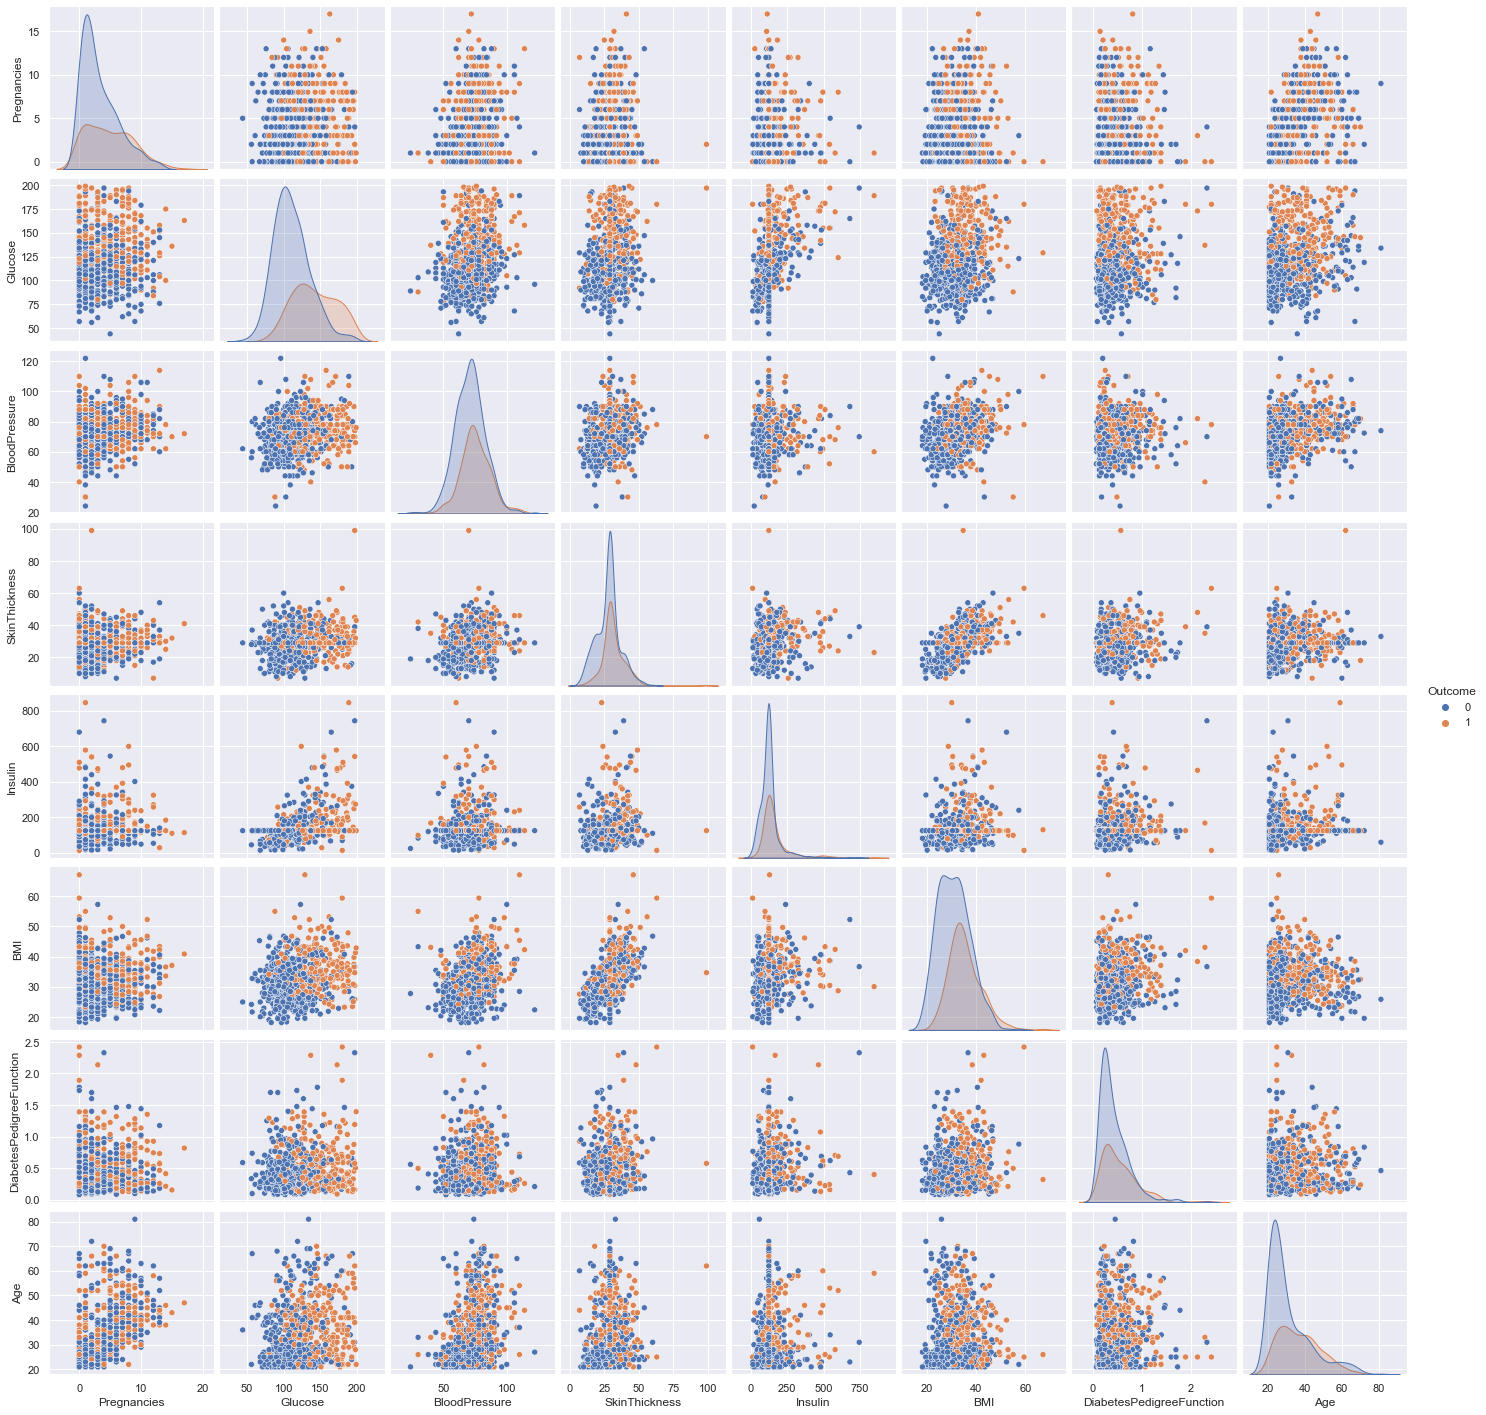

In [14]:
p=sns.pairplot(diabetes_data_copy, hue = 'Outcome' )

#### Generate heatmap on imputed data

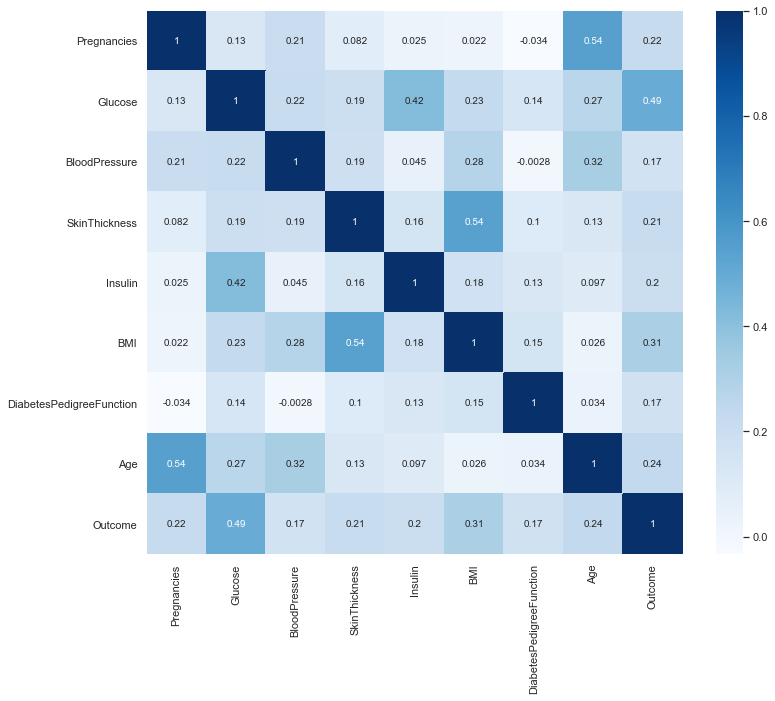

In [15]:
plt.figure(figsize=(12,10))
p=sns.heatmap(diabetes_data_copy.corr(), annot=True,cmap ='Blues')

#### Data Scaling

##### We need to scale the data so that the model is not affected by the magnitude of variables.

In [16]:
X_out = diabetes_data_copy[['Outcome']]
X_rem = diabetes_data_copy.drop(X_out,axis = 1)
print(X_out.shape,X_rem.shape)

(768, 1) (768, 8)


In [17]:
scaler = StandardScaler()
X_rem_sct = pd.DataFrame(scaler.fit_transform(X_rem))
X_rem_sct.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 
                     'DiabetesPedigreeFunction' ,'Age']
print(X_rem_sct.shape)
X_rem_sct.head(2)

(768, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672


In [18]:
print(X_out.shape,X_rem_sct.shape)

(768, 1) (768, 8)


In [19]:
#Re-index before merging
X_out.reset_index(inplace = True,drop = False)

X_out.head()

X_out.drop("index",inplace = True,axis = 1)
X_out.head(2)

,Outcome
0,1
1,0


In [20]:
#Merge the two sets of columns
df_merged = [X_out,X_rem_sct]
diabetes_data_copy = pd.concat(df_merged,axis = 1)
print(diabetes_data_copy.shape)
diabetes_data_copy.head(2)

(768, 9)


,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,0,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672


In [21]:
diabetes_data_copy

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,0,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,0,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,1,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496
...,...,...,...,...,...,...,...,...,...
763,0,1.827813,-0.680125,0.297376,2.150354,0.455573,0.064737,-0.908682,2.532136
764,0,-0.547919,0.010298,-0.198965,-0.239949,-0.181541,0.632365,-0.398282,-0.531023
765,0,0.342981,-0.022579,-0.033518,-0.695245,-0.332132,-0.910418,-0.685193,-0.275760
766,1,-0.844885,0.141808,-1.026200,-0.012301,-0.181541,-0.342790,-0.371101,1.170732


#### Train - Test - Valid Split

In [22]:
def mydf_splitter(diabetes_data_copy,num_rows):
    return diabetes_data_copy[:num_rows].copy(),diabetes_data_copy[num_rows:]


mydf_train_valid_X,mydf_test = mydf_splitter(diabetes_data_copy,614)

print(mydf_train_valid_X.shape,mydf_test.shape)

(614, 9) (154, 9)


In [23]:
my_df_train, my_df_valid = mydf_splitter(mydf_train_valid_X,460)

print(my_df_train.shape,my_df_valid.shape)

(460, 9) (154, 9)


In [24]:
Y = mydf_train_valid_X["Outcome"]
X = mydf_train_valid_X.drop(["Outcome"],axis = 1)

In [25]:
X_train,X_valid = mydf_splitter(X,430)
Y_train,Y_valid = mydf_splitter(Y,430)

print(X_train.shape,X_valid.shape,Y_train.shape,Y_valid.shape)

(430, 8) (184, 8) (430,) (184,)


#### KNN Classifier (Model 1)

In [26]:
knn = KNeighborsClassifier(n_neighbors = 5,weights = 'uniform')
knn.fit(X_train,Y_train)

#Predict on the validation set
Y_pred = knn.predict(X_valid)

Accuracy score : 0.7663043478260869
matthews_corrcoef : (0.4250979180921461, 0.5825242718446602)


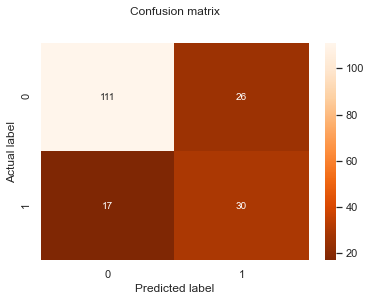

In [27]:
cnf_matrix = metrics.confusion_matrix(Y_valid, Y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Oranges_r", fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


print(f'Accuracy score : {accuracy_score(Y_valid,Y_pred)}')
print(f'matthews_corrcoef : {matthews_corrcoef(Y_valid,Y_pred),f1_score(Y_valid,Y_pred)}')

#### Random Forest Classifier (Model 2)

In [28]:
# Training RF classifier

random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)

# Finding the model accuracy on validation dataset
Y_pred_rf = random_forest.predict(X_valid)

Accuracy score : 0.8369565217391305
matthews_corrcoef : 0.5713620127348967
f1_score : 0.6808510638297872


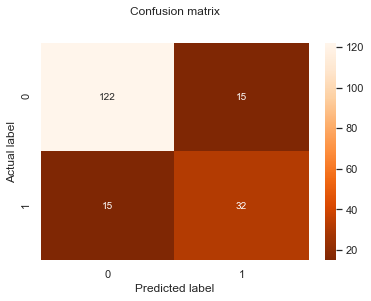

In [29]:
## Creating a confusion matrix to plot to results for validation dataset

cnf_matrix = metrics.confusion_matrix(Y_valid, Y_pred_rf)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Oranges_r" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


print(f'Accuracy score : {accuracy_score(Y_valid,Y_pred_rf)}')
print(f'matthews_corrcoef : {matthews_corrcoef(Y_valid,Y_pred_rf)}')
print(f'f1_score : {f1_score(Y_valid,Y_pred_rf)}')

# Hyperparameter Tuning for KNN

In [30]:
# Hyperparameter tuning for KNN - final 

params = {
    'n_neighbors' : list(range(1,20)),
    'weights'     : ['uniform', 'distance'],
    'algorithm'   : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size'   : list(range(1,10)),
    'p'           : [1,2]
}
grid_kn = GridSearchCV( KNeighborsClassifier(),
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 7, 
                        verbose = 1,
                        n_jobs = -1)

# Fit the model
grid_kn.fit(X_train, Y_train)

# Extract best estimator
print(grid_kn.best_estimator_)

# Test the bestfit
print(grid_kn.best_score_)

# Evaluate the model with best params
Y_predict = grid_kn.predict(X_valid)
print(f'Accuracy_score : {accuracy_score(Y_valid,Y_predict)}')
print(f'MCC: {matthews_corrcoef(Y_valid,Y_predict)}')
print(f'F1_score : {f1_score(Y_valid,Y_predict)}')

Fitting 7 folds for each of 2736 candidates, totalling 19152 fits
KNeighborsClassifier(leaf_size=1, n_neighbors=10)
0.7159099493843016
Accuracy_score : 0.8260869565217391
MCC: 0.5305551519188745
F1_score : 0.6444444444444444


# Hyperparameter tuning for Random Forest Classifier

In [31]:
rf_model = RandomForestClassifier()

rf_grid = {
    'n_estimators'      : list(range(10, 50, 100)),
    'max_features'      : ['auto', 'sqrt', 'log2'],
    'criterion'         : ['gini', 'entropy'],
    'max_depth'         : [None, 1, 2, 3, 4, 5],
    'min_samples_split' : list(range(2,5)),
    'min_samples_leaf'  : list(range(1,5))
}

# Create the grid:
rf_gs = GridSearchCV(rf_model, rf_grid, cv=3, n_jobs=-1)

# Fit using grid search:
rf_gs.fit(X_train, Y_train)

# Print best accuracy and best parameters:
print('Best accuracy: %.3f' % rf_gs.best_score_)
print('\nBest params:\n', rf_gs.best_params_)

Best accuracy: 0.753

Best params:
 {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 10}


# Creating the KNN model using best estimate parameters 

In [47]:
knn_best_model = KNeighborsClassifier( leaf_size=1, n_neighbors=10)
knn_best_model.fit(X_train,Y_train)

Y_predict = knn_best_model.predict(X_valid)
knn_train_accuracy = accuracy_score(Y_valid,Y_predict)
knn_train_accuracy

0.8260869565217391

# Creating RF Classifier using best estimate parameters

In [48]:
# Fitting the model with best params 

rf_best_model = RandomForestClassifier(criterion= 'entropy', max_depth= 3, max_features= 'log2', 
                                       min_samples_leaf= 3, min_samples_split= 4, n_estimators= 10)
rf_best_model.fit(X_train,Y_train)
Y_predict = rf_best_model.predict(X_valid)
rf_train_accuracy = accuracy_score(Y_valid,Y_predict)
rf_train_accuracy

0.8206521739130435

# Testing the KNN model

In [49]:
mydf_test_Y = mydf_test["Outcome"]
mydf_test_X = mydf_test.drop(["Outcome"],axis = 1)

In [50]:
y_prd_test_knn = knn_best_model.predict(mydf_test_X)
knn_test_accuracy = accuracy_score(mydf_test_Y,y_prd_test_knn)
print(f'Accuracy score for KNN : {knn_test_accuracy}')

Accuracy score for KNN : 0.7337662337662337


# Testing RF Classifier Model

In [51]:
y_prd_test_rf = rf_best_model.predict(mydf_test_X)
rf_test_accuracy= accuracy_score(mydf_test_Y,y_prd_test_rf)
print(f'Accuracy score for Random Forest Classifier : {rf_test_accuracy}')

Accuracy score for Random Forest Classifier : 0.7727272727272727


# KNN Model Performance

# 1.Confusion Matrix

In [52]:
confusion_matrix(mydf_test_Y,y_prd_test_knn)
pd.crosstab(mydf_test_Y, y_prd_test_knn, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,86,13,99
1,28,27,55
All,114,40,154


Accuracy score : 0.7337662337662337
matthews_corrcoef : 0.3929445992626297
f1_score : 0.5684210526315789


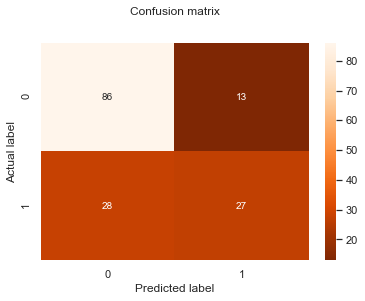

In [53]:
cnf_matrix = metrics.confusion_matrix(mydf_test_Y, y_prd_test_knn)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Oranges_r" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print(f'Accuracy score : {accuracy_score(mydf_test_Y,y_prd_test_knn)}')
print(f'matthews_corrcoef : {matthews_corrcoef(mydf_test_Y,y_prd_test_knn)}')
print(f'f1_score : {f1_score(mydf_test_Y,y_prd_test_knn)}')

# 2.Classification Report 

In [54]:
print(classification_report(mydf_test_Y,y_prd_test_knn))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81        99
           1       0.68      0.49      0.57        55

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.73      0.73      0.72       154



## 3. ROC - AUC



In [55]:
y_pred_proba = knn_best_model.predict_proba(mydf_test_X)[:,1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(mydf_test_Y, y_pred_proba)

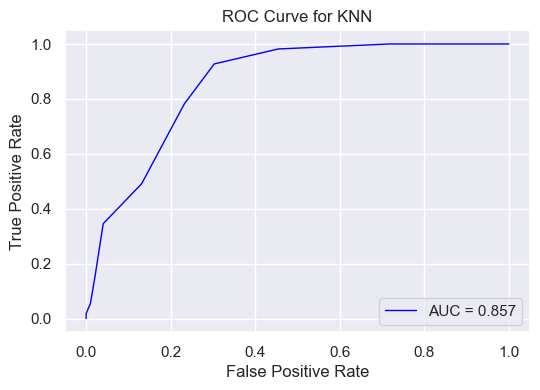

In [56]:
# Get area under the curve
roc_auc_knn = auc(fpr_knn, tpr_knn)
# PLOT ROC curve
plt.figure(dpi=100)
plt.plot(fpr_knn, tpr_knn, lw=1, color='blue', label=f'AUC = {roc_auc_knn:.3f}')
plt.title('ROC Curve for KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()


# Random Forest Model Performance

# 1.Confusion Matrix

In [57]:
confusion_matrix(mydf_test_Y,y_prd_test_rf)
pd.crosstab(mydf_test_Y,y_prd_test_rf, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,87,12,99
1,23,32,55
All,110,44,154


Accuracy score : 0.7727272727272727
matthews_corrcoef : 0.488546503365251
f1_score : 0.6464646464646464


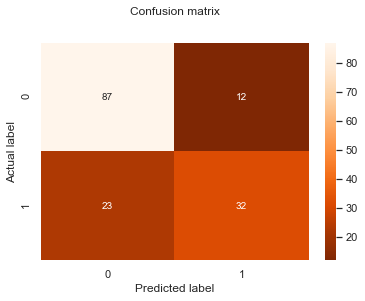

In [58]:
cnf_matrix = metrics.confusion_matrix(mydf_test_Y,y_prd_test_rf)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Oranges_r" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


print(f'Accuracy score : {accuracy_score(mydf_test_Y,y_prd_test_rf)}')
print(f'matthews_corrcoef : {matthews_corrcoef(mydf_test_Y,y_prd_test_rf)}')
print(f'f1_score : {f1_score(mydf_test_Y,y_prd_test_rf)}')

# 2.Classification Report

In [59]:
print(classification_report(mydf_test_Y,y_prd_test_rf))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        99
           1       0.73      0.58      0.65        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



# ROC-AUC Curve

In [60]:
y_pred_proba_rf = rf_best_model.predict_proba(mydf_test_X)[:,1]
fpr, tpr, thresholds = roc_curve(mydf_test_Y, y_pred_proba_rf)

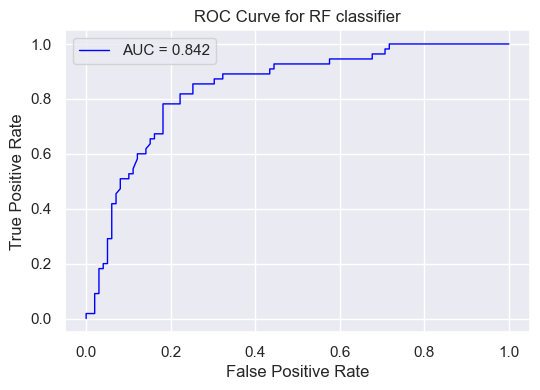

In [61]:
# Get area under the curve
roc_auc_rf = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=100)
plt.plot(fpr, tpr, lw=1, color='blue', label=f'AUC = {roc_auc_rf:.3f}')
plt.title('ROC Curve for RF classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()


## Conclusion

### We applied KNN and Random Forest Classifier technique on the diabetes dataset and based on above implementation, accuracy scores are as below -

### Accuracy of KNN: 0.73
### Accuracy Random Forest Classifier: 0.77

